## Week3：
1. 最小二乘法，极大似然估计，梯度下降
2. 极大似然估计 (Negative log likelihood)
3. 最小二乘法 （minimize sum of squares error）
4. 逆矩阵 
5. QR分解
6. 坐标下降 (Coordinate Descent)

### 1. 最小二乘法介绍：（Normal Equation）

#### 1. 最小二乘法与极大似然估计：

极大似然估计是从概率角度出发，寻找使这个结果出现的可能性最大的参数。

最小二乘法是从loss function 角度出发，寻找 loss function 的最小值，也就是**Normal Equation（求导等于0）**。**基于均方误差最小化来进行模型求解的方法称为最小二乘法**。

#### 2. 最小二乘法与梯度下降：

最小二乘法与梯度下降的相同点：目标函数相同，并且都是对参数求偏导。 

最小二乘法与梯度下降的不同点：最小二乘法为非迭代方法，梯度下降为迭代方法。

#### 3. 最小二乘法优缺点：

最小二乘法优点：

    1. 与梯度下降相比，最小二乘法不需要考虑learning rate。

最小二乘法缺点：

    1. 最小二乘法因为需要求逆矩阵，当特征数量较大时，逆矩阵计算比较耗时。
     
    2. 最小二乘法只适用于线性回归。

### 2. Negative Log Likelihood （MLE）

1.**一个特征值的**公式推导如下：

$ f\left(x_i\right) = mx_i + c$, $y_i = f\left(x_i\right)+\epsilon_i$, 其中 $\epsilon_i$ 服从正态分布 $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$


因为$y_i = mx_i + c$ 为常数，所以 $y_i = f\left(x_i\right)+\epsilon_i$ 服从正态分布 $y_i\sim \mathcal{N}(mx_i + c, \sigma^2)$


根据正态分布概率密度函数可知：$p\left(y_i|x_i,m,c, \sigma^2\right)=\frac{1}{\sqrt{2\pi \sigma^2}}
             \exp \left(-\frac{\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$
             
             
假设 $y_i$ 服从独立同分布 **IID Assumption**，所以 $p(\mathbf{y}|\mathbf{x}, m, c,\sigma^2) = \prod_{i=1}^n p(y_i|x_i, m, c, \sigma^2)$ = $p(\mathbf{y}|\mathbf{x}, m, c, \sigma^2) = \prod_{i=1}^n \frac{1}{\sqrt{2\pi \sigma^2}}\exp \left(-\frac{\left(y_i-mx_i- c\right)^{2}}{2\sigma^2}\right)$

所以，$p(\mathbf{y}|\mathbf{x}, m, c, \sigma^2) = \frac{1}{\left(2\pi \sigma^2\right)^{\frac{n}{2}}}\exp \left(-  
                                      \frac{\sum_{i=1}^n\left(y_i-mx_i-c\right)^{2}}{2\sigma^2}\right).$

等式两边同时取log可得：

$L(m,c,\sigma^{2})=-\frac{n}{2}\log 2\pi -\frac{n}{2}\log \sigma^2 -\sum _{i=1}^{n}\frac{\left(y_i-mx_i-    
        c\right)^{2}}{2\sigma^2}.$
        
去掉常数项，**同时取负号(Negative)**：

$E(m,c,\sigma^{2}) \propto \sum _{i=1}^{n}\left(y_i- mx_i-c\right)^{2}.$




2.**n个特征值的**公式推导如下：

预测函数：

$$ y = \mathbf{w}^\top \mathbf{X}.$$

其中 w 为列向量, x 为 **design matrix**。
$$
\mathbf{w} = \begin{bmatrix} 
\mathbf{w}_0 \\\ 
\mathbf{w}_1 \\\ 
\vdots \\\
\mathbf{w}_n
\end{bmatrix},
\mathbf{X} = 
            \begin{bmatrix} 
                1 & 1 & \cdots & 1\\
                \mathbf{x}_1^1 & \mathbf{x}_2^1 & \cdots & \mathbf{x}_m^1\\
                \vdots \\
                \mathbf{x}_1^n & \mathbf{x}_2^n & \cdots & \mathbf{x}_m^n\\
             \end{bmatrix} 
$$

代价函数：

$$E(\mathbf{w},\sigma^2)  = \frac{n}{2}\log \sigma^2 + \frac{1}{2\sigma^2}\sum 
                              _{i=1}^{n}y_i^{2}-\frac{1}{\sigma^2}
                             \mathbf{w}^\top\sum_{i=1}^{n}\mathbf{x}_iy_i
                             +\frac{1}{2\sigma^2} 
                           \mathbf{w}^{\top}\left[\sum_{i=1}^{n}\mathbf{x}_i
                           \mathbf{x}_i^{\top}\right]\mathbf{w}.$$

对w求偏导：

$$\frac{\partial E\left(\mathbf{w},\sigma^2 \right)}{\partial \mathbf{w}}=-\frac{1}{\sigma^2} \sum _{i=1}^{n}\mathbf{x}_iy_i+\frac{1}{\sigma^2} \left[\sum _{i=1}^{n}\mathbf{x}_i\mathbf{x}_i^{\top}\right]\mathbf{w}$$

令等式为0:

$$\mathbf{w} = \left[\sum _{i=1}^{n}\mathbf{x}_i\mathbf{x}_i^{\top}\right]^{-1}\sum _{i=1}^{n}\mathbf{x}_iy_i.$$

其中：

$$\sum _{i=1}^{n}\mathbf{x}_i\mathbf{x}_i^\top = \mathbf{X}^\top \mathbf{X}\qquad \sum _{i=1}^{n}\mathbf{x}_iy_i = \mathbf{X}^\top \mathbf{y}$$

最后 w 为：

$$\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}$$


### 3. Normal Equation（注意矩阵求导）：

$$
E(\mathbf{w})= (\mathbf{y} - \mathbf{X}\mathbf{w})^\top (\mathbf{y} - \mathbf{X}\mathbf{w})
$$

$$
E(\mathbf{w})= \mathbf{y}^\top\mathbf{y} - 2\mathbf{y}^\top\mathbf{X}\mathbf{w} + \mathbf{w}^\top\mathbf{X}^\top\mathbf{X}\mathbf{w}
$$

$$
\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w})=- 2\mathbf{X}^\top \mathbf{y} + 2\mathbf{X}^\top\mathbf{X}\mathbf{w} = 0
$$

$$\mathbf{w} = \left(\mathbf{X}^\top \mathbf{X}\right)^{-1} \mathbf{X}^\top \mathbf{y}$$

**python 中使用 w = np.linalg.solve(np.dot(X.T, X), np.dot(X.T, y))**

**上述公式需要注意矩阵可逆的问题。此外，上述公式需要计算$\mathbf{X}^\top \mathbf{X}$，然而平方计算会降低计算精确性，通过QR分解可以避免。**

#### 矩阵求导：

$$
\frac{\text{d} \mathbf{y}^\top\mathbf{X}\mathbf{w}}{\text{d} \mathbf{w}} = \left(\mathbf{y}^\top\mathbf{X}\right)^\top = \mathbf{X}^\top \mathbf{y}
$$

$$
\frac{\text{d} \mathbf{w}^\top \mathbf{A} \mathbf{w}}{\text{d} \mathbf{w}} = 2 \mathbf{Aw}
$$

### 4. 逆矩阵：

(1) **什么样的矩阵可逆？**

非奇异矩阵，也就是**行列式不为零**的**方阵**。**non-singular (e.g. determinat different from zero, or has full-rank).**

可逆矩阵 = 非奇异矩阵 = 满秩矩阵（行向量或列向量线性无关）

(2) **在什么情况下$\mathbf{X}^\top\mathbf{X}$不可逆？**

1. 样本的数量小于特征的数量。此时，回归系数会变得很大，无法求解。在统计学上，可证明A的最小二乘解为无偏估计，即多次得到的采样值X而计算出来的多个系数估计值向量 的平均值将无限接近于真实值向量β。
https://blog.csdn.net/Dang_boy/article/details/78504258


2. 特征中存在至少两个特征之间线性相关 (不满足满秩矩阵的性质)。

(3) **如何解决不可逆情况？**

1. 增加样本数量。

2. 采用正则化方法 **脊回归**。

3. 删除线性相关的特征 **降维**。

### 5. QR 分解：

将一个矩阵分解为一个正交矩阵与一个上三角矩阵的乘积。QR分解也有若干种算法，常见包括：Gram-Schmidt, Householder, Givens等。

$$
\mathbf{X}^\top \mathbf{X} \mathbf{W} = \mathbf{X}^\top \mathbf{y}
$$

$$
(\mathbf{Q}\mathbf{R})^\top (\mathbf{Q}\mathbf{R})\mathbf{W} = (\mathbf{Q}\mathbf{R})^\top \mathbf{y}
$$

$$
\mathbf{R}^\top (\mathbf{Q}^\top \mathbf{Q}) \mathbf{R} \mathbf{W} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y}
$$

$$
\mathbf{R}^\top \mathbf{R} \mathbf{W} = \mathbf{R}^\top \mathbf{Q}^\top \mathbf{y}
$$

$$
\mathbf{R} \mathbf{W} = \mathbf{Q}^\top \mathbf{y}
$$

In [ ]:
# QR decomposition.
import scipy as sp
Q, R = np.linalg.qr(X)
w = sp.linalg.solve_triangular(R, np.dot(Q.T, y))

## 6. 坐标下降 Coordinate Descent: 

坐标下降属于非梯度优化算法，与梯度下降优化算法沿着梯度最快下降方向寻找函数极值不同，坐标下降算法依次沿着坐标轴的方向最小化目标函数。

$$f(x) = \mathbf{w}_0\mathbf{x}_0 + \mathbf{w}_1\mathbf{x}_1 + ... + \mathbf{w}_n\mathbf{x}_n （x为特征值）$$

$$E(\mathbf{w}) =  \sum_{i=1}^n(y_i-f(x_i))^2$$

**注意：坐标下降目标函数与梯度下降目标函数相同。**

坐标下降步骤：

初始化 $\mathbf{w}$。

更新 $\mathbf{w}$: {

* 更新 $\mathbf{w}_1$，$\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w}_1)=0 $，其中 $\mathbf{w}_0, \mathbf{w}_2, ..., \mathbf{w}_n$ 已知。
* 更新 $\mathbf{w}_2$，$\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w}_2)=0 $，其中 $\mathbf{w}_1$ 为更新后的值，$\mathbf{w}_0, \mathbf{w}_3, ..., \mathbf{w}_n$ 已知。
* 更新 $\mathbf{w}_3$，$\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w}_3)=0 $，其中 $\mathbf{w}_1, \mathbf{w}_2$ 为更新后的值，$\mathbf{w}_0, \mathbf{w}_3, ..., \mathbf{w}_n $ 已知。
* ...
* 更新 $\mathbf{w}_n$，$\frac{\text{d}}{\text{d}\mathbf{w}}E(\mathbf{w}_n)=0 $，其中 $\mathbf{w}_0, \mathbf{w}_2, ..., \mathbf{w}_{n-1}$ 为更新后的值。

}

Error :  1.998749250259151


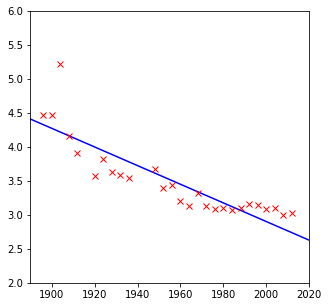

In [5]:
import pods
%matplotlib inline 
import pylab as plt
from IPython import display
import numpy as np

data = pods.datasets.olympic_marathon_men()
x = data['X']
y = data['Y']

m = -0.4
c = 80 
x_test = np.linspace(1890, 2020, 10)[:, None]

def linear_regression(m, c):
    for i in np.arange(100):
        m = ((y - c)*x).sum()/(x*x).sum() # only one feature y = m*x + c
        c = (y-m*x).sum()/y.shape[0] 
    E = ( (y - (m*x + c))**2 ).sum()
    return m, c, E

def run_LR(x_test, n, m, c):
    cond = True
    while cond:
        m, c, E = linear_regression(m, c)
        f_test = m*x_test + c
        if E < 2:
            cond = False
        display.clear_output(wait = True)
        print("Error : ", E)
        plt.figure(figsize = (5, 5))
        plt.plot(x_test, f_test, 'b-')
        plt.plot(x, y, 'rx')
        plt.xlim(1890, 2020)
        plt.ylim(2, 6)
        plt.pause(1.5)
    
run_LR(x_test, 10, m, c)